# 🏏 IPL EDA Analysis (2008–2020)

This project performs Exploratory Data Analysis (EDA) on IPL cricket data to uncover insights into team performances, player statistics, and match trends.
Dataset source: [Kaggle - IPL Dataset](https://www.kaggle.com/datasets/hiimanshuagarwal/ipl-dataset-2008-2020)

## 🛠 Tools & Libraries

- Python
- pandas
- matplotlib
- seaborn
- Jupyter Notebook / Google Colab


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


## 📂 Dataset Overview

- `matches.csv`: Match-level data (date, venue, teams, winner, toss, etc.)
- `deliveries.csv`: Ball-by-ball data (runs per ball, wickets, batsmen, bowlers, etc.)


In [25]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

matches.head()
deliveries.head()
matches.info()
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

## 📊 EDA: Match-Level Analysis


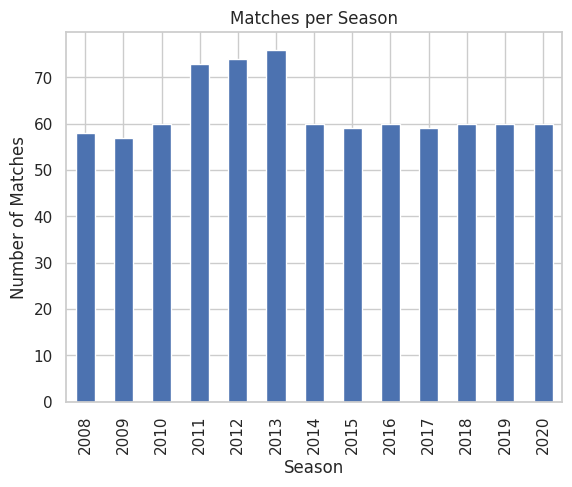

In [26]:
matches['date'] = pd.to_datetime(matches['date'])
matches['season'] = matches['date'].dt.year

matches['season'].value_counts().sort_index().plot(kind='bar', title='Matches per Season')
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()



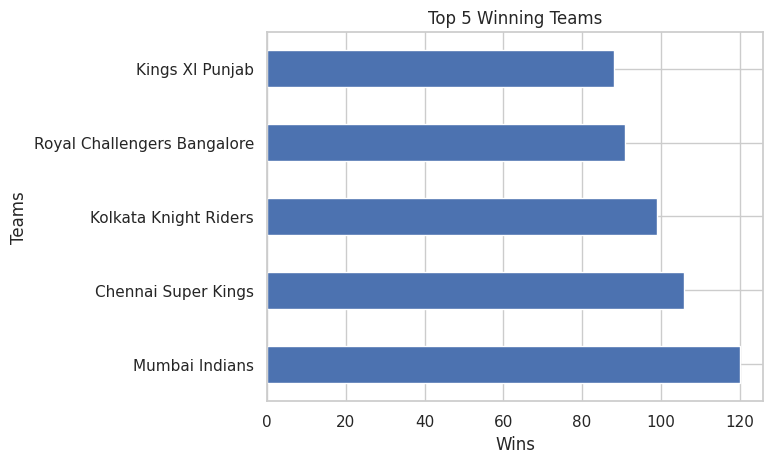

In [27]:
matches['winner'].value_counts().head(5).plot(kind='barh', title='Top 5 Winning Teams')
plt.xlabel("Wins")
plt.ylabel("Teams")
plt.show()

In [ ]:
matches['toss_winner'].value_counts().head(5).plot(kind='barh', title='Top 5 Toss Winners')
plt.xlabel("Toss Wins")
plt.ylabel("Teams")
plt.show()

In [ ]:
same_winner = matches[matches['toss_winner'] == matches['winner']]
percentage = len(same_winner) / len(matches) * 100
print(f"Toss winner also won the match {percentage:.2f}% of the time.")

In [ ]:
matches['player_of_match'].value_counts().head(10).plot(kind='barh', title='Top 10 Players of the Match')
plt.xlabel("Awards")
plt.ylabel("Players")
plt.show()

In [ ]:
matches['venue'].value_counts().head(10).plot(kind='barh', title='Top 10 Venues')
plt.xlabel("Number of Matches")
plt.ylabel("Venues")
plt.show()


In [ ]:
matches['city'].value_counts().head(10).plot(kind='barh', title='Top 10 Cities')
plt.xlabel("Number of Matches")
plt.ylabel("Cities")
plt.show()

## 🎯 EDA: Ball-by-Ball Analysis


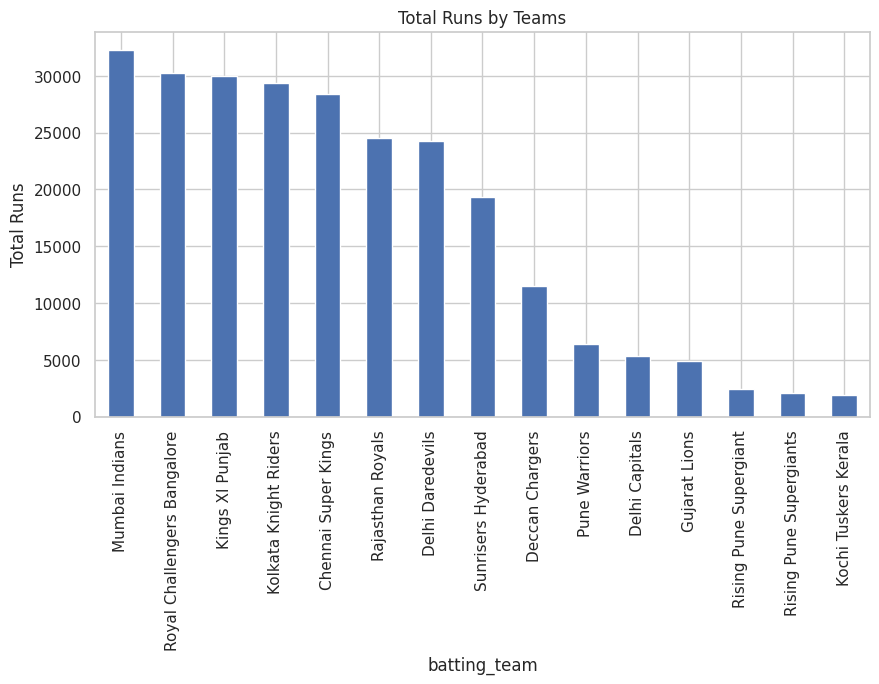

In [28]:
deliveries.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).plot(
    kind='bar', title='Total Runs by Teams', figsize=(10,5))
plt.ylabel("Total Runs")
plt.show()

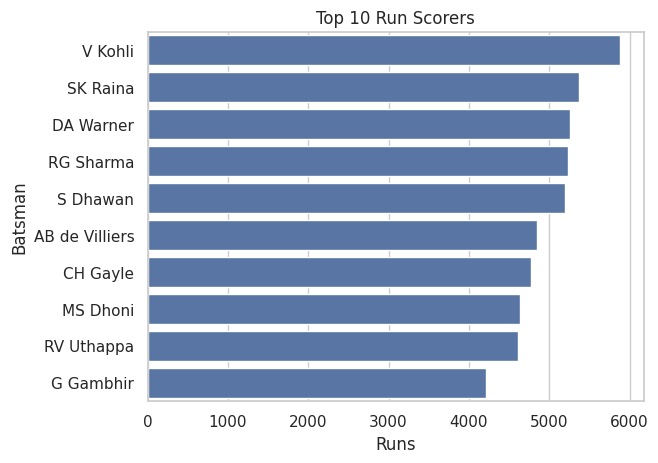

In [29]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.show()


In [ ]:
valid_dismissals = deliveries[deliveries['dismissal_kind'].notnull() & (deliveries['dismissal_kind'] != 'run out')]

top_bowlers = valid_dismissals['bowler'].value_counts().head(10)

sns.barplot(x=top_bowlers.values, y=top_bowlers.index)
plt.title("Top 10 Wicket-Takers")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()

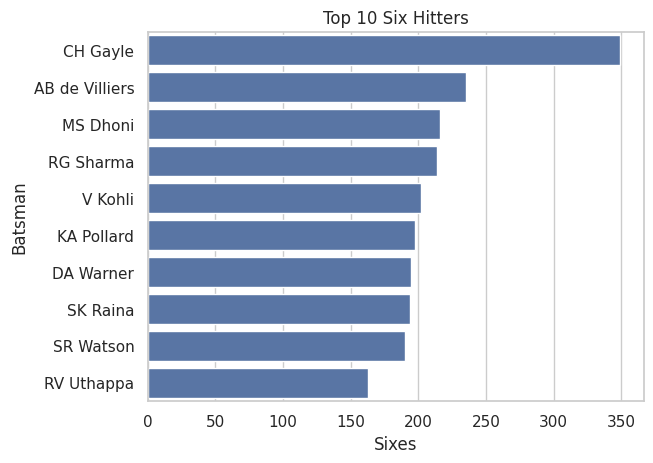

In [30]:

sixes = deliveries[deliveries['batsman_runs'] == 6]
top_six_hitters = sixes['batsman'].value_counts().head(10)

sns.barplot(x=top_six_hitters.values, y=top_six_hitters.index)
plt.title("Top 10 Six Hitters")
plt.xlabel("Sixes")
plt.ylabel("Batsman")
plt.show()

________________________________________


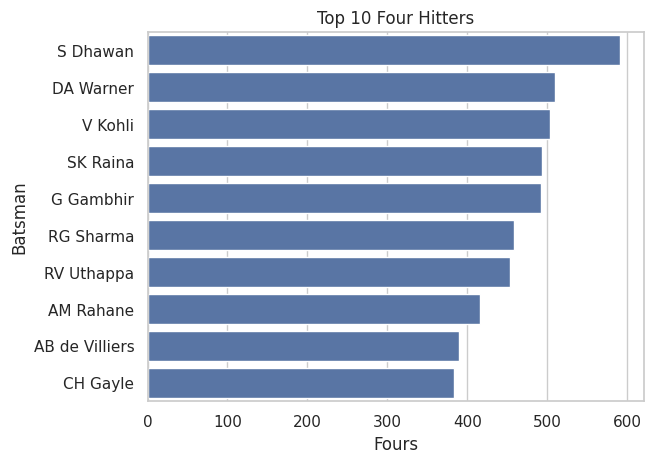

In [ ]:

fours = deliveries[deliveries['batsman_runs'] == 4]
top_four_hitters = fours['batsman'].value_counts().head(10)

sns.barplot(x=top_four_hitters.values, y=top_four_hitters.index)
plt.title("Top 10 Four Hitters")
plt.xlabel("Fours")
plt.ylabel("Batsman")
plt.show()

In [ ]:
extras_by_team = deliveries.groupby('bowling_team')['extra_runs'].sum().sort_values(ascending=False)

extras_by_team.plot(kind='bar', figsize=(10, 5), title='Total Extra Runs Conceded by Teams')
plt.xlabel("Bowling Team")
plt.ylabel("Extra Runs")
plt.show()

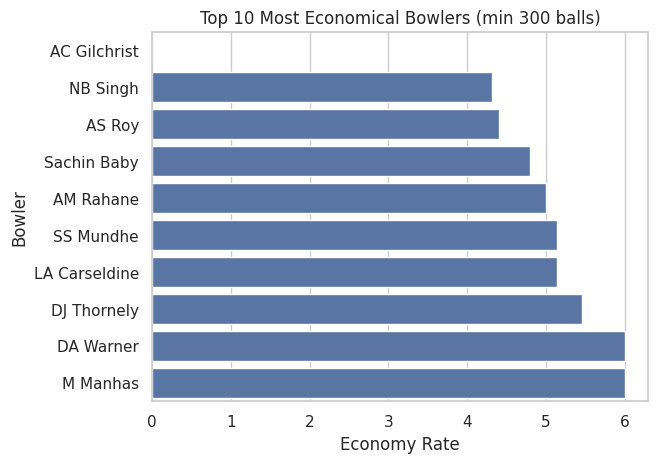

In [ ]:
bowler_stats = deliveries.groupby('bowler').agg(
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
)


owler_stats = bowler_stats[bowler_stats['balls_bowled'] >= 300].copy()
bowler_stats['economy'] = (bowler_stats['runs_conceded'] / bowler_stats['balls_bowled']) * 6
economical_bowlers = bowler_stats.sort_values(by='economy').head(10)

sns.barplot(x=economical_bowlers['economy'], y=economical_bowlers.index)
plt.title("Top 10 Most Economical Bowlers (min 300 balls)")
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.show()

In [ ]:
batsman_stats = deliveries.groupby('batsman').agg(
    runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
)

batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 200]
batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls_faced']) * 100

top_strikers = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)

sns.barplot(x=top_strikers['strike_rate'], y=top_strikers.index)
plt.title("Top 10 Batsmen by Strike Rate (min 200 balls)")
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.show()